In [2]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
import time
%matplotlib notebook

In [3]:
def pshift(a, s):
    """
    A convenience function that translate peridically array `a` to bring point `s = (i, j)` at the origin. 
    """
    return np.roll(np.roll(a, s[0], axis=0), s[1], axis=1)

def crosscorrelate(imref, imtest):
    """
    Compute the cross-correlation between images using FFTs
    """
    return np.fft.ifftn( np.fft.fftn(imref) * np.fft.fftn(imtest).conj() ).real

def rgb_compare(img0, img1):
    """
    Create a RGB image with img0 as the red channel and img1 as the blue channel to check alignment.
    """
    rgb = np.zeros(img0.shape + (3,), dtype=np.uint8)
    rgb[:,:,0] = (255.*img0/np.percentile(img0, 99.9)).clip(0,255).astype(np.uint8)
    rgb[:,:,2] = (255.*img1/np.percentile(img1, 99.9)).clip(0,255).astype(np.uint8)
    return rgb

In [5]:
# Load images
image_list = [imageio.imread('flower_%02d.png' % i) for i in range(30)]

<IPython.core.display.Javascript object>


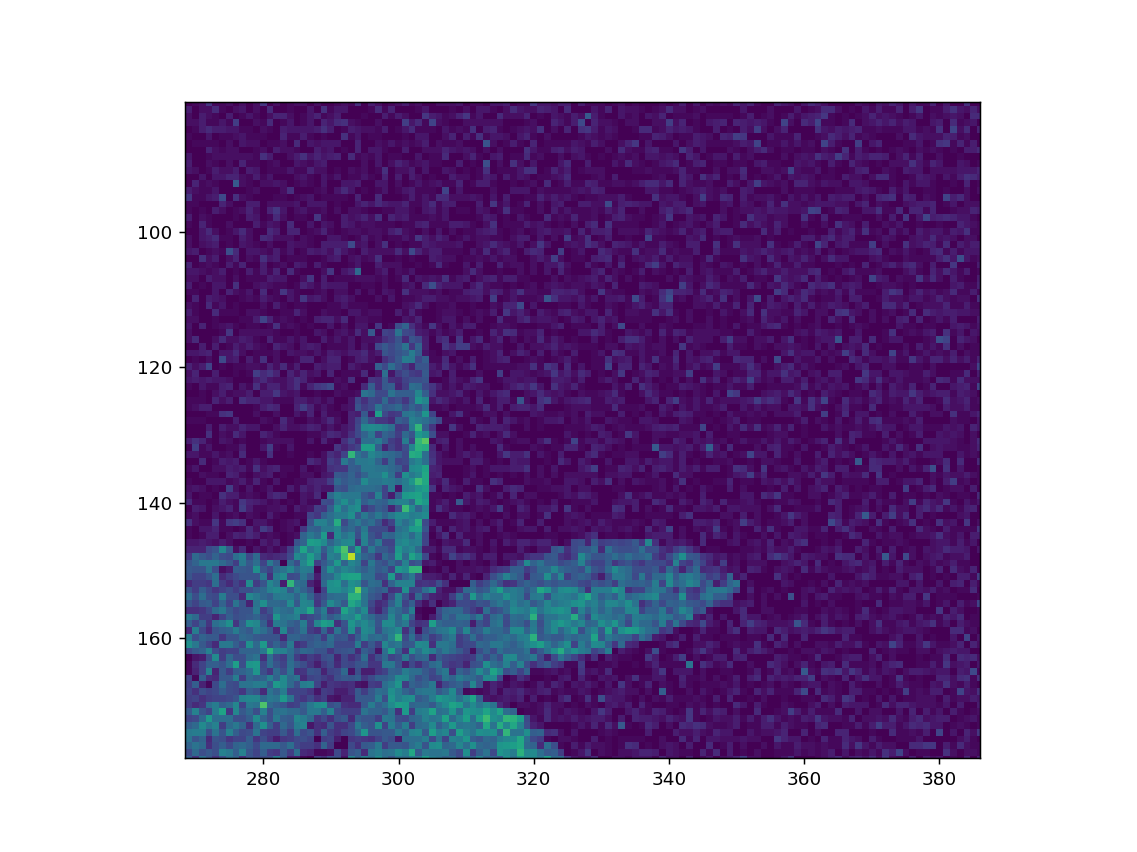

In [7]:
img0 = image_list[0]
plt.figure()
plt.imshow(img0, vmax=50)

0 205


<IPython.core.display.Javascript object>


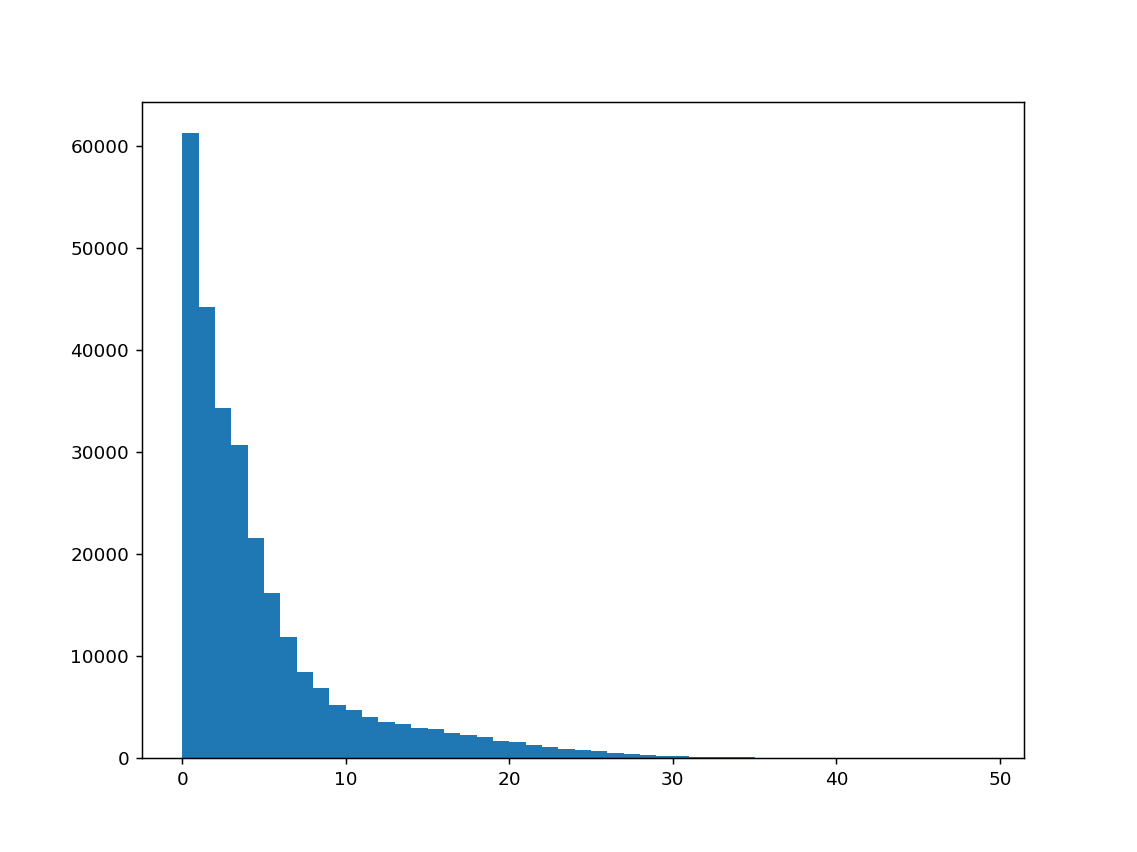

(array([6.1225e+04, 4.4251e+04, 3.4325e+04, 3.0660e+04, 2.1552e+04,
        1.6196e+04, 1.1889e+04, 8.4380e+03, 6.8610e+03, 5.2470e+03,
        4.7140e+03, 4.0210e+03, 3.5660e+03, 3.3700e+03, 2.9760e+03,
        2.8410e+03, 2.5240e+03, 2.2870e+03, 2.0820e+03, 1.6850e+03,
        1.5540e+03, 1.2990e+03, 1.0800e+03, 9.1600e+02, 7.7000e+02,
        6.6800e+02, 4.7600e+02, 4.2200e+02, 3.3800e+02, 2.5300e+02,
        1.9700e+02, 1.6300e+02, 1.5800e+02, 1.0900e+02, 9.8000e+01,
        7.0000e+01, 6.2000e+01, 5.7000e+01, 3.5000e+01, 3.6000e+01,
        3.0000e+01, 2.9000e+01, 3.2000e+01, 2.3000e+01, 2.1000e+01,
        2.1000e+01, 1.6000e+01, 8.0000e+00, 1.9000e+01]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

In [6]:
print(img0.min(), img0.max())
plt.figure()
plt.hist(img0.ravel(), np.arange(50))

<IPython.core.display.Javascript object>


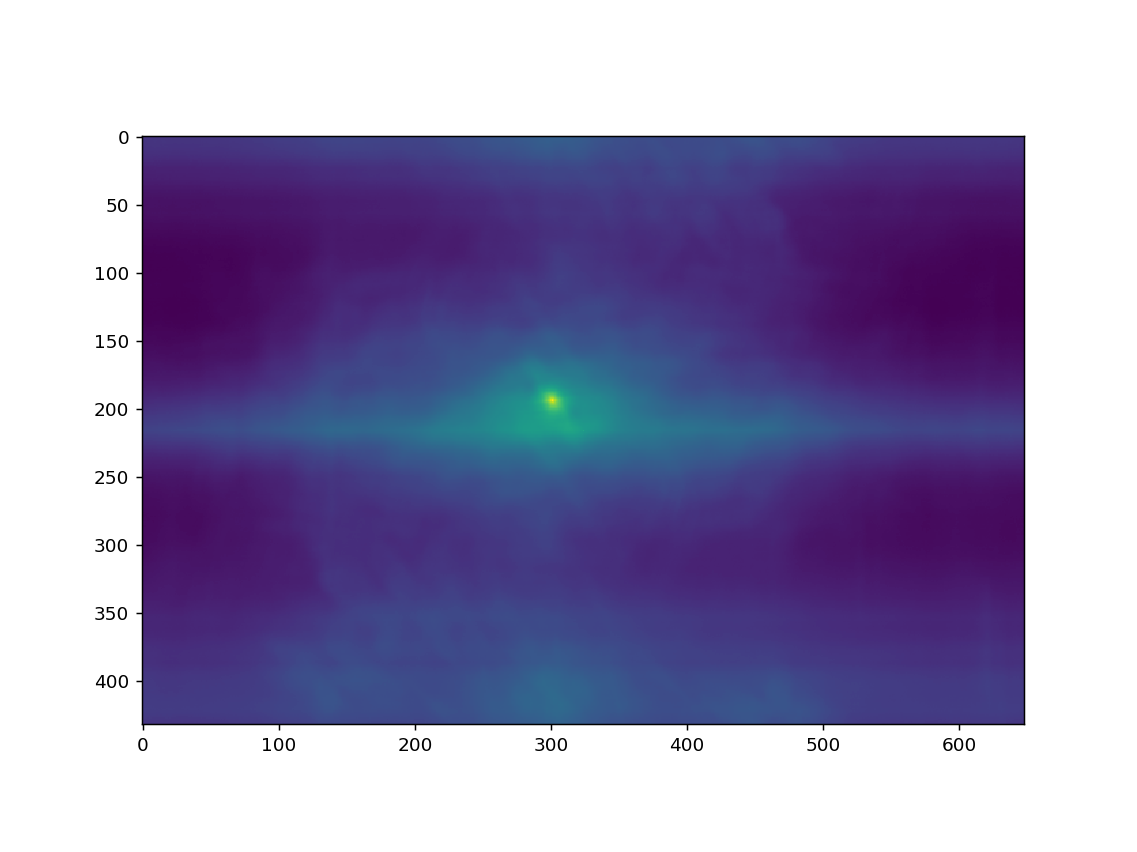

In [11]:
img1 = image_list[1]
cc = crosscorrelate(img0, img1)
plt.figure()
plt.imshow(np.fft.fftshift(cc))

<IPython.core.display.Javascript object>


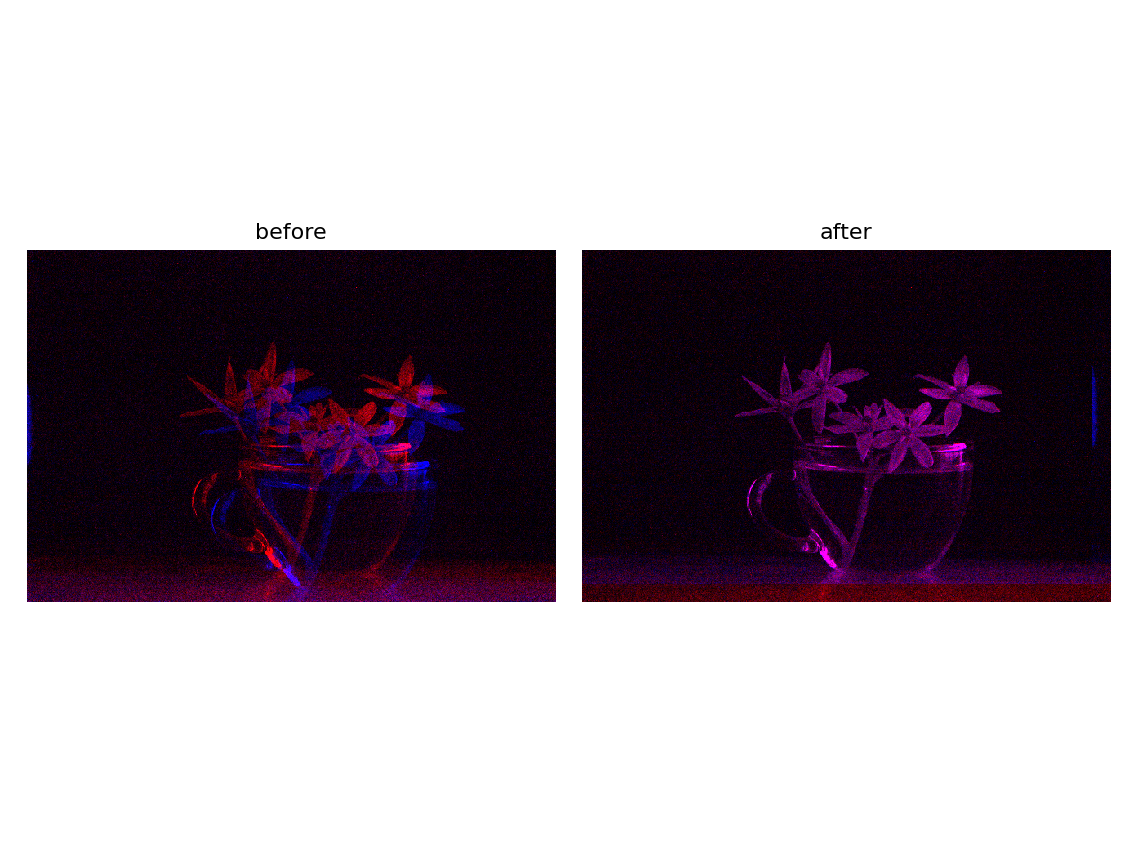

In [14]:
shift = np.unravel_index(cc.argmax(), cc.shape)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(rgb_compare(img0, img1))
ax1.axis('off')
ax1.set_title('before')
ax2.imshow(rgb_compare(img0, pshift(img1, shift)))
ax2.axis('off')
ax2.set_title('after')
fig.tight_layout()

<IPython.core.display.Javascript object>


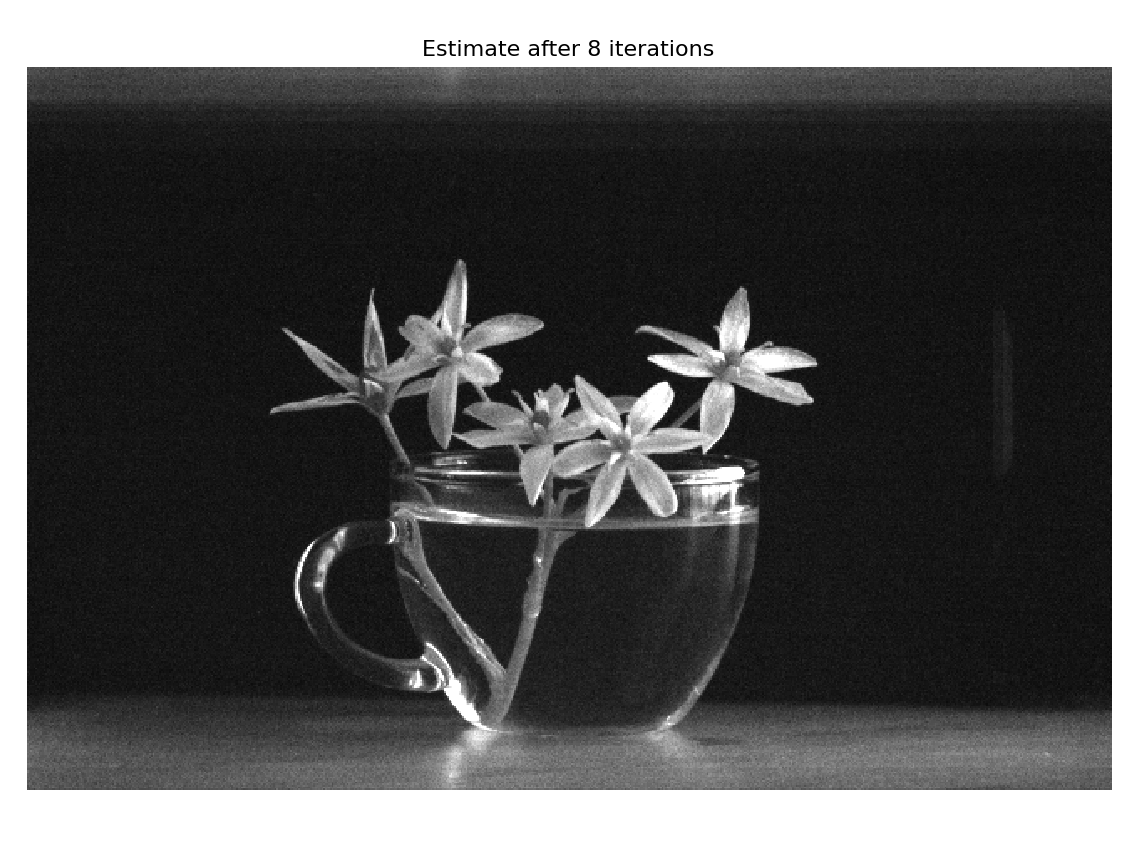

In [20]:
# First estimate
obj = np.mean(image_list, axis=0)
fig = plt.figure()
pltimg = plt.imshow(obj, cmap='gray')
plt.axis('off')
plt.title('First estimate')
plt.tight_layout()

In [21]:
shifts = np.zeros((len(image_list), 2), dtype=int)
n_iter = 10

for iloop in range(n_iter):
    stop = True
    for i, img in enumerate(image_list):
        cc = crosscorrelate(obj, img)
        maxpos = np.unravel_index(cc.argmax(), cc.shape)
        if np.any(maxpos != shifts[i]):
            stop = False
        shifts[i] = maxpos
    
    if stop:
        break
    
    obj = np.mean([pshift(img, shifts[i]) for i, img in enumerate(image_list)], axis=0)
    
    pltimg.set_data(obj)
    plt.title('Estimate after %d iterations' % (iloop + 1))
    fig.canvas.draw()
    time.sleep(.5)
        
        

In [19]:
iloop

8